# Bivariate Analysis

    looking at data two series at a time

### 3 main scenarios:

1. both are quantitative
1. one is quantitative, other is qualitative
1. both are qualitative


Interesting situation is when one of relatioships is time - temporal data analysis or temporal data mining (in which one variable is time)

#### 1. Numerical vs Numerical (both quantitative)

1. scatterplot
1. line plot
1. heatmap for correlation
1. joint plot


#### 2. Categorical vs Numerical (one qualitative, one quantitative)

1. bar chart
1. violin plot
1. categorical box plot
1. swarm plot

#### 3. Two Categorical Variables (both qualitative)

1. bar chart
1. grouped bar chart
1. point plot

## Case Study - Suicide rates

focus on eda: describing data, not modeling or predicting, exploring

connect eda to certain ideas in statistics

### 1.1 load libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import dataset

In [29]:
 data = pd.read_csv('../files/master.csv')

### 1.3 check data head()

In [30]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 1.4 check data.describe()

In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### 1.5 check the columns

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

### 1.6 check the shape of data

In [7]:
data.shape

(27820, 12)

### 1.7 count the datatypes

In [9]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [10]:
### 1.8 check the data set information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### 1.9 check the dataset missing values

In [13]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)# total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


In [16]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe() # descriptive stats of continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


### 1.10 frequency table for age

one-way tables

In [18]:
my_tab = pd.crosstab(index=data['age'], 
                    columns='count')

my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


### 1.11 bar plot to check number of suicides by top countries

### Example of Categorical vs Numerical:

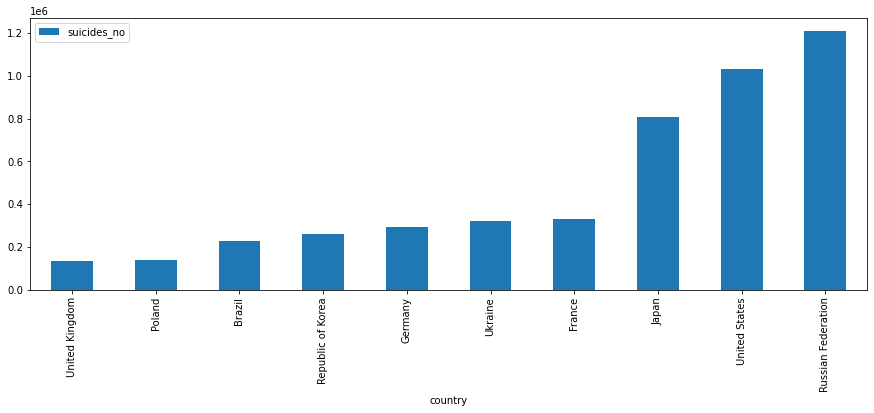

In [21]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country', 
                                                                                                         y='suicides_no', 
                                                                                                         kind='bar', 
                                                                                                         figsize=(15,5))

plt.show()

# bar plot
# numerical x - country
# y of counts (suicide numbers)
# notice plot() arguments
# groupby on data, then plot on groupby

In [22]:
### 1.12 bar plot to check number of suicides by bottom countries

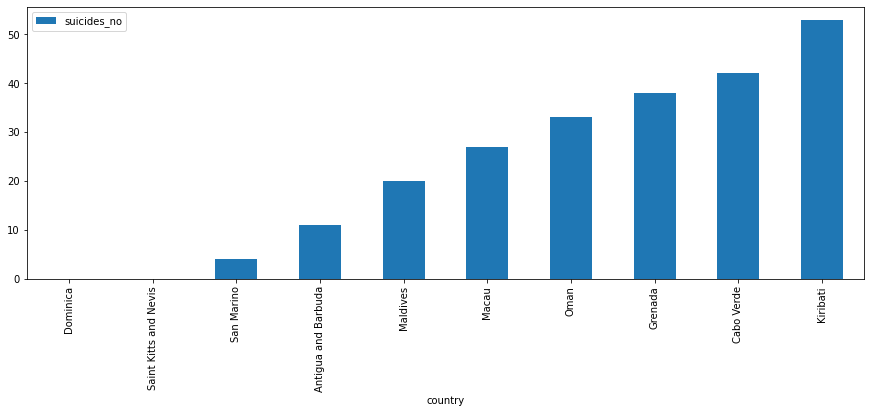

In [24]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'], 
        ascending=True).head(10).plot(x='country', y='suicides_no', kind='bar', figsize=(15,5))

plt.show()

# 10 smallest

### 1.13 bar plot for number of suicides vs age

### Categorical vs Numerical

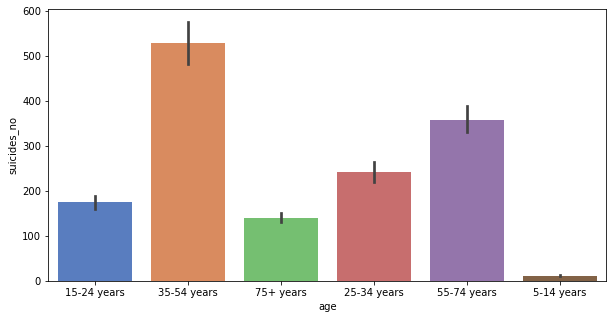

In [27]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')

# x-axis: age
# y-axis: num of suicides
# line at top of bar: range of variation around average - indicates variability that is present in suicide number count
# ex: if asking "diference in num of suicides across years?" should be comparing if arrow bars should be intersectin with each other or not
# indicative of high and low value

### 1.14 bar plot Number of Suicides vs Sex

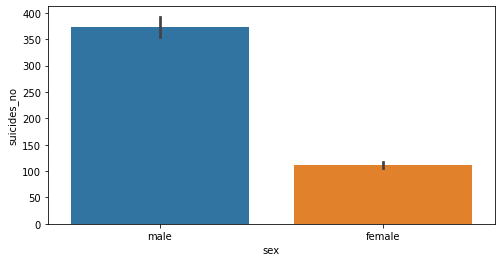

In [28]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='sex', y='suicides_no', data=data)

### 1.15.a bar plot number of suicides vs generation

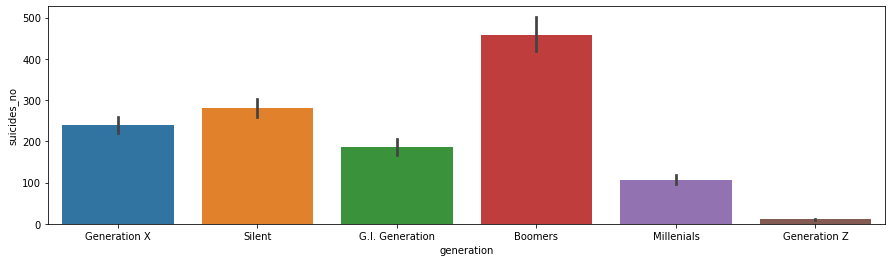

In [29]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x='generation', y='suicides_no', data=data)

### 1.15.b scatterplot number of suicides vs population

### Numerical vs Numerical

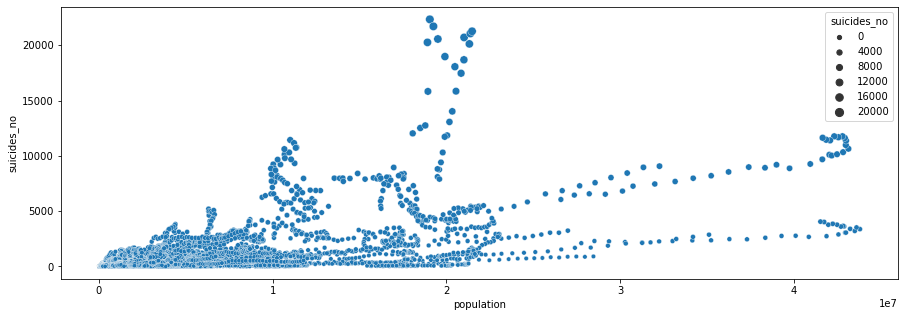

In [34]:
figure = plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x=data['population'], y='suicides_no', data=data,size='suicides_no')

# x & y used to define axis, however, there is no causal relationship
# x does not cause y; no y = f(x) or y=a+bx
# not building model, simply describing it

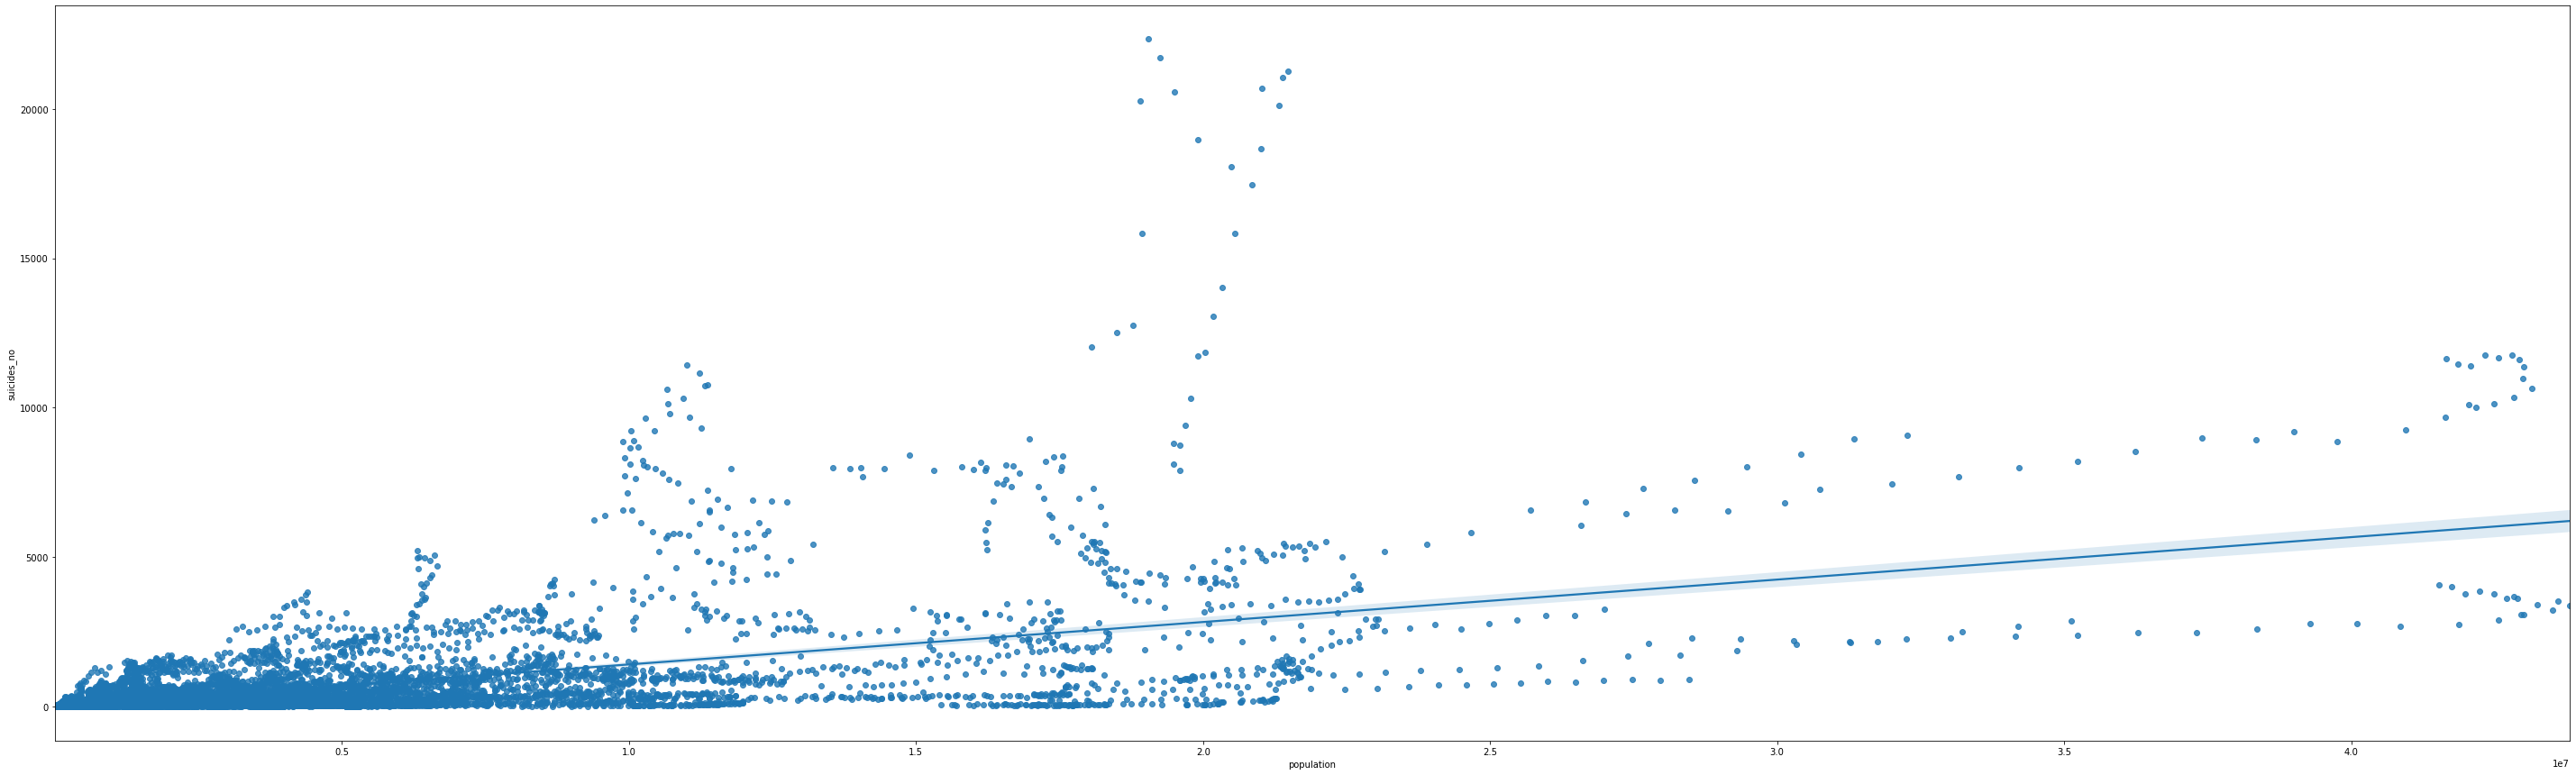

In [37]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population', y='suicides_no', data=data)

# regression line - used to represent relationship between variables; not predict but represent
# slope upwards - positive relationship between suicides and population
# one of simplest ways for doing supervised learning - learn the y variable as relationship involving x variable

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

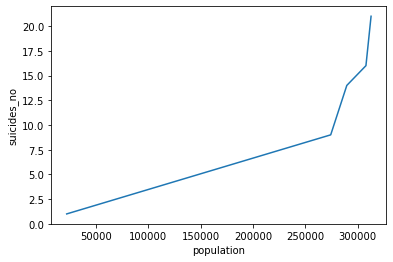

In [6]:
sns.lineplot(x='population', y='suicides_no', data=data.head())

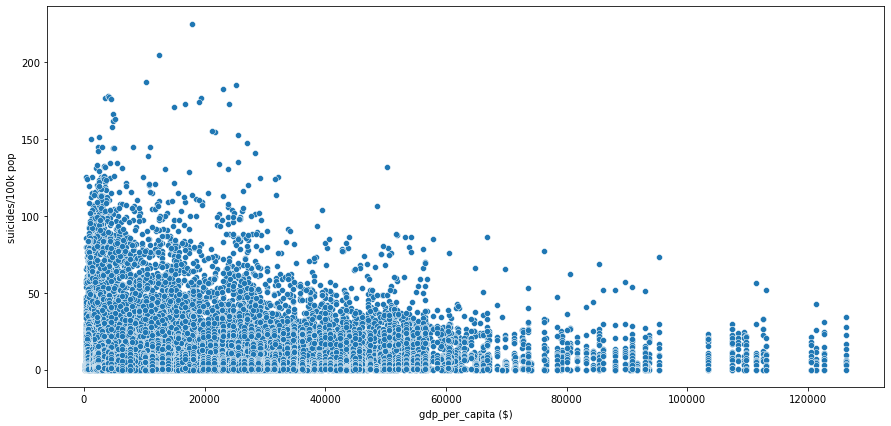

In [9]:
figure= plt.figure(figsize=(15,7))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data)
plt.show()
# prescriptive analytics vs desccriptive analytics?

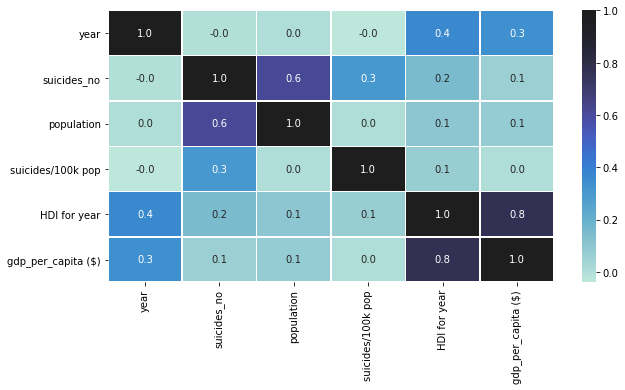

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5,fmt = '.1f', center = 1)
plt.show()

### 1.17.1 bar plot to check number of suicides by sex and age (three variables used to generate a single plot)

### 1 Numerial and 2 Categorical variables 

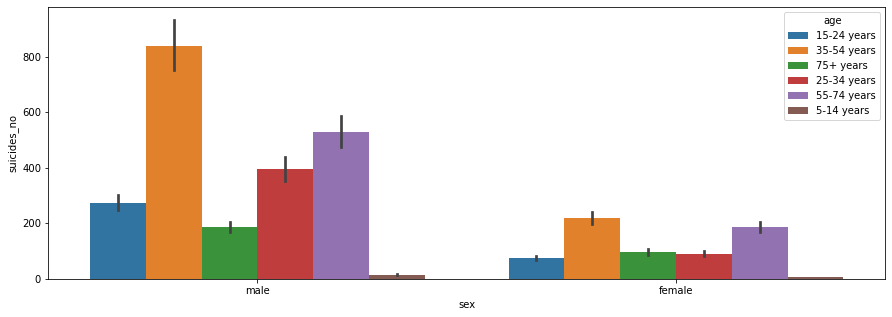

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex', y='suicides_no', hue='age')
plt.show()

### 1.17.2 Bar plot to check number of suicides by sex and generation (three variables)

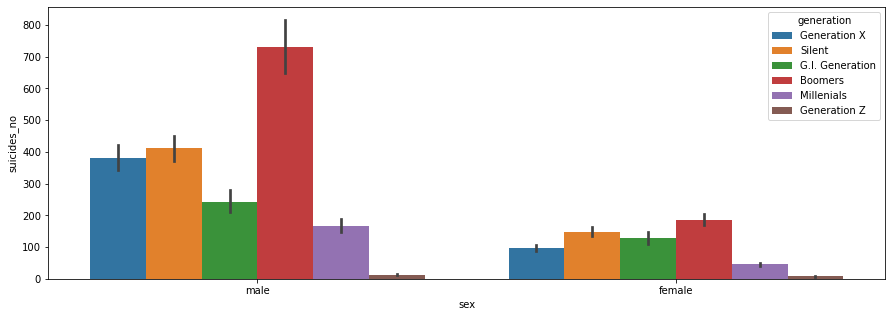

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='sex', y='suicides_no', hue='generation')
plt.show()

### 1.18 checking the No. of suicides: country vs sex

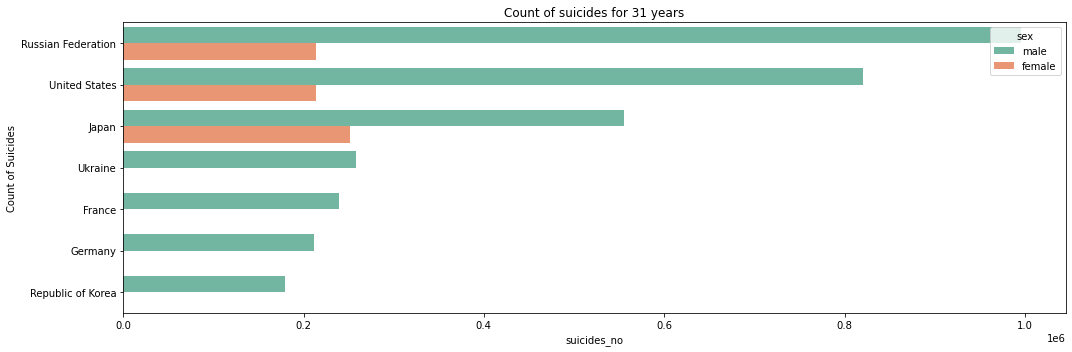

In [17]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no', ascending=False)
most_cont_m = suic_sum_m.head(10)

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years')

sns.barplot(y='country',x='suicides_no', hue='sex', data=most_cont_m,palette='Set2');

plt.ylabel('Count of Suicides')
plt.tight_layout()

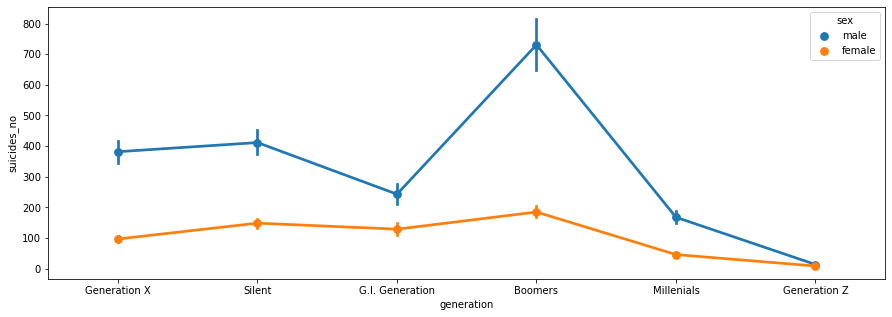

In [20]:
plt.figure(figsize=(15,5))

sns.pointplot(x='generation', y='suicides_no', hue='sex', data=data)
plt.show()

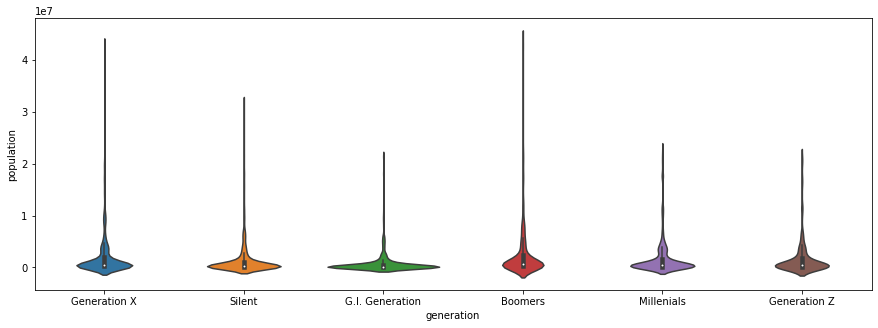

In [21]:
plt.figure(figsize=(15,5))
sns.violinplot(x=data.generation, y = data['population'])
plt.show()

### Temporal Data

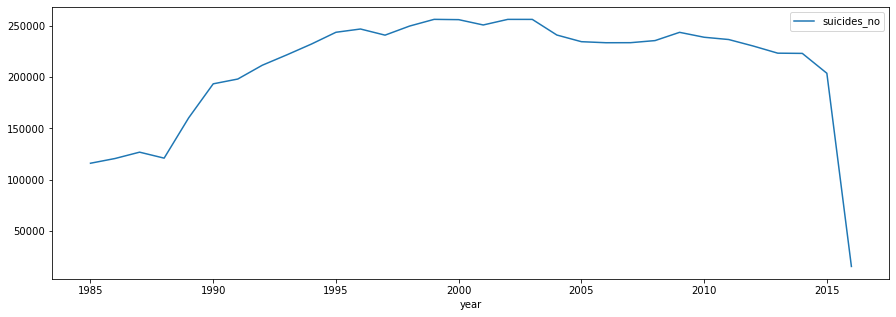

In [24]:
data[['year', 'suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

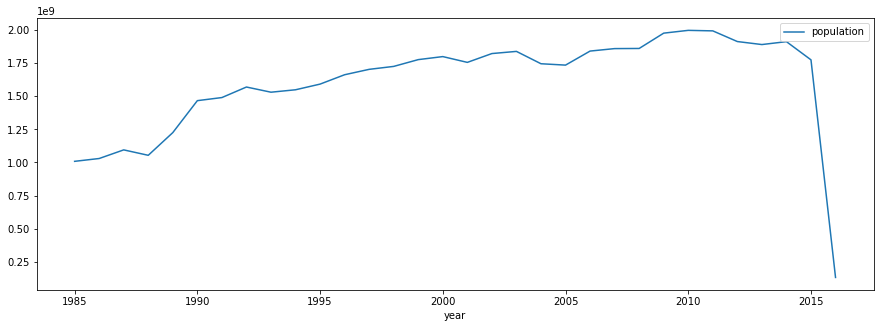

In [25]:
data[['year', 'population']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

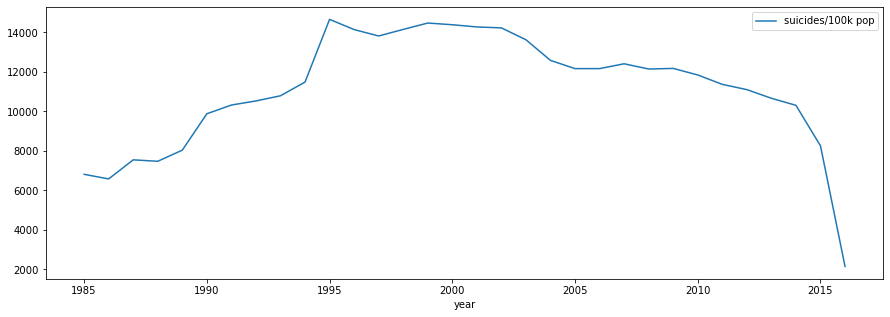

In [26]:
data[['year', 'suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()